In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('usdjpy.csv',  parse_dates=['年月日'], index_col=['年月日'])

In [3]:

df

,終値
年月日,
2021-01-04 07:00:00,103.222
2021-01-04 08:00:00,103.248
2021-01-04 09:00:00,103.064
2021-01-04 10:00:00,103.058
2021-01-04 11:00:00,102.983
...,...
2023-01-26 18:00:00,129.959
2023-01-26 19:00:00,129.680
2023-01-26 20:00:00,129.824


In [4]:
df["終値_遅行"] = df["終値"].shift(26)

In [11]:
#変化率
df["終値_変化率"] = df["終値"].pct_change()
df

,終値,終値_遅行,終値_平均,終値_変化率
年月日,,,,
2021-01-04 07:00:00,103.222,NaN,121.007392,NaN
2021-01-04 08:00:00,103.248,NaN,121.007392,0.000252
2021-01-04 09:00:00,103.064,NaN,121.007392,-0.001782
2021-01-04 10:00:00,103.058,NaN,121.007392,-0.000058
2021-01-04 11:00:00,102.983,NaN,121.007392,-0.000728
...,...,...,...,...
2023-01-26 18:00:00,129.959,130.434,121.007392,0.001125
2023-01-26 19:00:00,129.680,130.240,121.007392,-0.002147
2023-01-26 20:00:00,129.824,129.850,121.007392,0.001110


C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 123

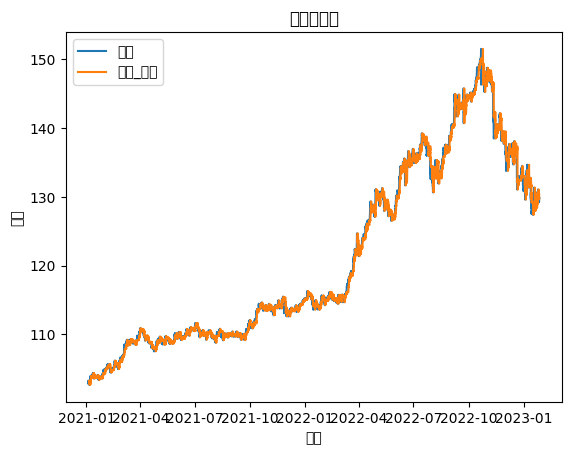

In [12]:
# グラフを描画
plt.plot(df.index, df["終値"], label="終値")
plt.plot(df.index, df["終値_遅行"], label="終値_遅行")
plt.title("終値と遅行")
plt.xlabel("日付")
plt.ylabel("価格")
plt.legend()
plt.show()

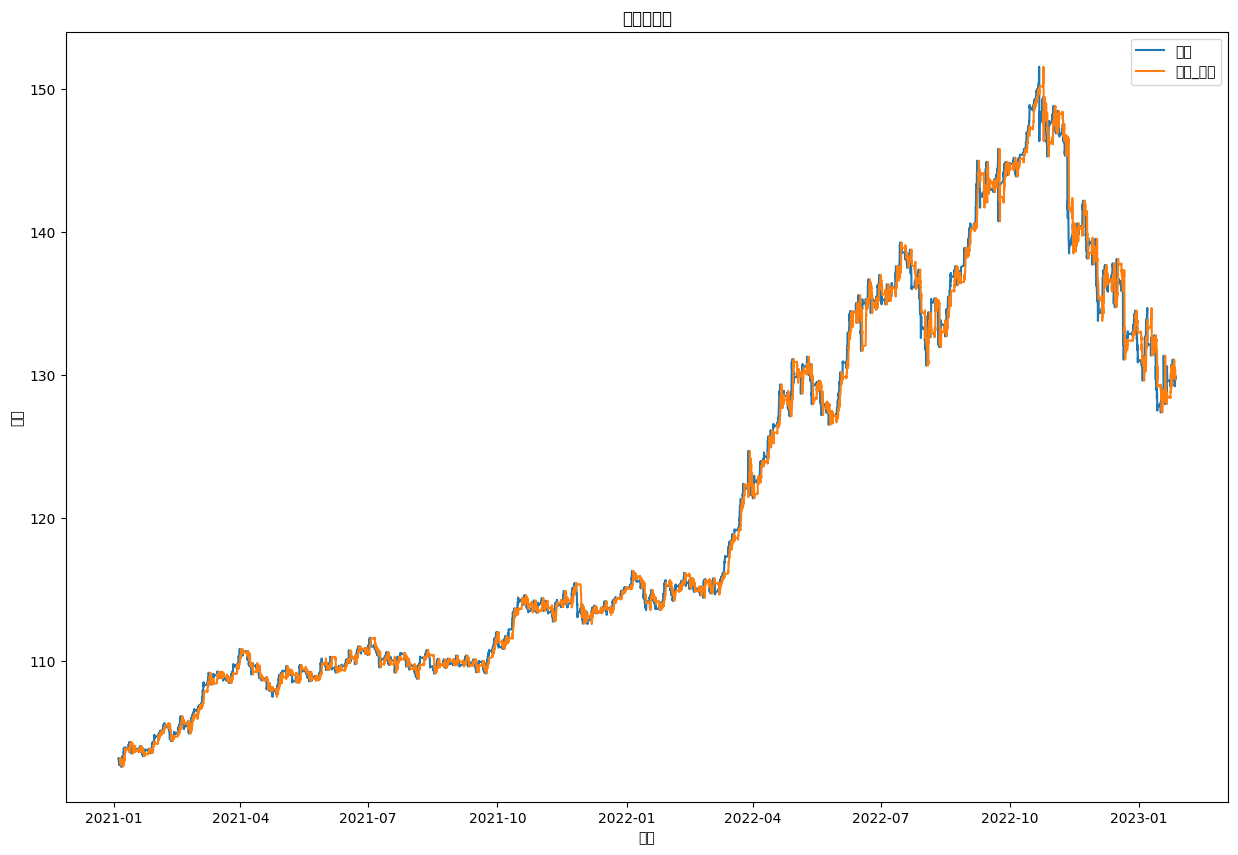

In [6]:
# グラフのサイズを指定
plt.figure(figsize=(15, 10))

# グラフを描画
plt.plot(df.index, df["終値"], label="終値")
plt.plot(df.index, df["終値_遅行"], label="終値_遅行")
plt.title("終値と遅行")
plt.xlabel("日付")
plt.ylabel("価格")
plt.legend()
plt.show()

In [18]:
#移動平均
df["終値_平均"] = df["終値"].rolling(480).mean()

C:\Users\ohmur\AppData\Local\Temp\ipykernel_3620\64357049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["終値_平均"] = df["終値"].rolling(480).mean()


In [19]:
df

,終値,終値_遅行,終値_平均,終値_変化率
年月日,,,,
2021-01-05 09:00:00,103.122,103.222,NaN,-0.000136
2021-01-05 10:00:00,103.128,103.248,NaN,0.000058
2021-01-05 11:00:00,103.113,103.064,NaN,-0.000145
2021-01-05 12:00:00,103.035,103.058,NaN,-0.000756
2021-01-05 13:00:00,102.995,102.983,NaN,-0.000388
...,...,...,...,...
2023-01-26 18:00:00,129.959,130.434,130.597085,0.001125
2023-01-26 19:00:00,129.680,130.240,130.588890,-0.002147
2023-01-26 20:00:00,129.824,129.850,130.580581,0.001110


In [20]:
# NaNを除去
df = df.dropna()

C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohmur\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 320

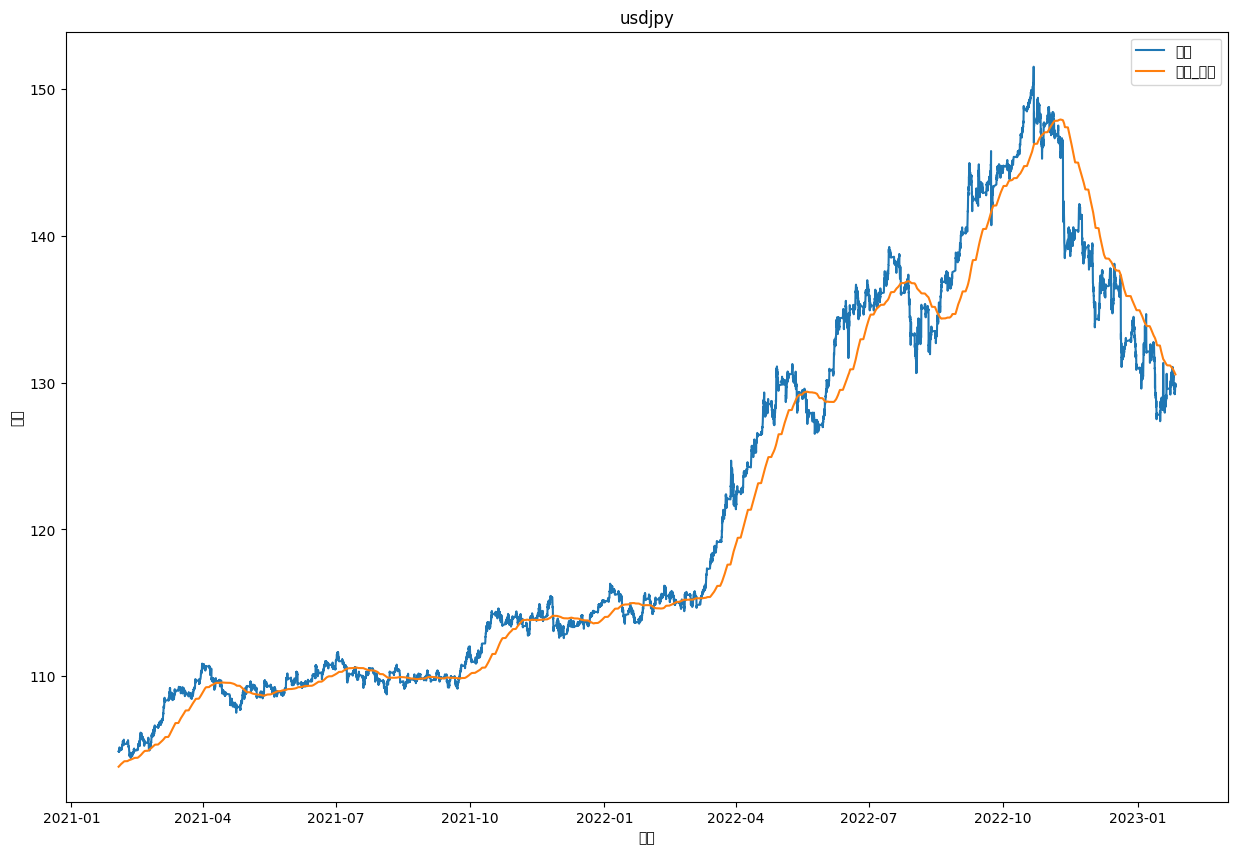

In [21]:
# グラフのサイズを指定
plt.figure(figsize=(15, 10))

# グラフを描画
plt.plot(df.index, df["終値"], label="終値")
plt.plot(df.index, df["終値_平均"], label="終値_平均")
plt.title("usdjpy")
plt.xlabel("日付")
plt.ylabel("価格")
plt.legend()
plt.show()

In [15]:
df["終値_差分"] = df["終値"].diff()
df

,終値,終値_差分
年月日,,
2021-01-04 07:00:00,103.222,NaN
2021-01-04 08:00:00,103.248,0.026
2021-01-04 09:00:00,103.064,-0.184
2021-01-04 10:00:00,103.058,-0.006
2021-01-04 11:00:00,102.983,-0.075
...,...,...
2023-01-26 18:00:00,129.959,0.146
2023-01-26 19:00:00,129.680,-0.279
2023-01-26 20:00:00,129.824,0.144


In [16]:
df["終値_変化率"] = df["終値"].pct_change()
df

,終値,終値_差分,終値_変化率
年月日,,,
2021-01-04 07:00:00,103.222,NaN,NaN
2021-01-04 08:00:00,103.248,0.026,0.000252
2021-01-04 09:00:00,103.064,-0.184,-0.001782
2021-01-04 10:00:00,103.058,-0.006,-0.000058
2021-01-04 11:00:00,102.983,-0.075,-0.000728
...,...,...,...
2023-01-26 18:00:00,129.959,0.146,0.001125
2023-01-26 19:00:00,129.680,-0.279,-0.002147
2023-01-26 20:00:00,129.824,0.144,0.001110
